In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel(r"C:\Users\hp\Downloads\Sales and Profit Data (1).xlsx")

# Preview the data
df.head()

# Check missing values
print(df.isnull().sum())

# Heatmap of missing values


# Drop duplicates
df = df.drop_duplicates()

# Fill or drop missing values
df.ffill(inplace=True)
  # or df.dropna()

# Confirm cleaning
print("After cleanning:")
print(df.isnull().sum())
print(df.head())


Order Date       0
Customer Name    0
State            0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Profit           0
dtype: int64
After cleaning:
Order Date       0
Customer Name    0
State            0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Profit           0
dtype: int64
  Order Date  Customer Name         State         Category Sub-Category  \
0 2021-01-03  Darren Powers         Texas  Office Supplies        Paper   
1 2021-01-04  Phillina Ober      Illinois  Office Supplies       Labels   
2 2021-01-04  Phillina Ober      Illinois  Office Supplies      Storage   
3 2021-01-04  Phillina Ober      Illinois  Office Supplies      Binders   
4 2021-01-05     Mick Brown  Pennsylvania  Office Supplies          Art   

                                        Product Name   Sales  Quantity  Profit  
0  Message Book, Wirebound, Four 5 1/2" X 4" Form...   16.45         2    6.00  
1  

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8314 entries, 0 to 8313
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order Date     8314 non-null   datetime64[ns]
 1   Customer Name  8314 non-null   object        
 2   State          8314 non-null   object        
 3   Category       8314 non-null   object        
 4   Sub-Category   8314 non-null   object        
 5   Product Name   8314 non-null   object        
 6   Sales          8314 non-null   float64       
 7   Quantity       8314 non-null   int64         
 8   Profit         8314 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 584.7+ KB
None


📊 Sales Summary:
 count     8314.000000
mean       232.004794
std        629.917690
min          0.440000
25%         17.340000
50%         55.000000
75%        211.960000
max      22638.480000
Name: Sales, dtype: float64

📈 Profit Summary:
 count    8314.000000
mean       29.824575
std       232.045890
min     -6599.980000
25%         1.722500
50%         8.790000
75%        29.987500
max      8399.980000
Name: Profit, dtype: float64


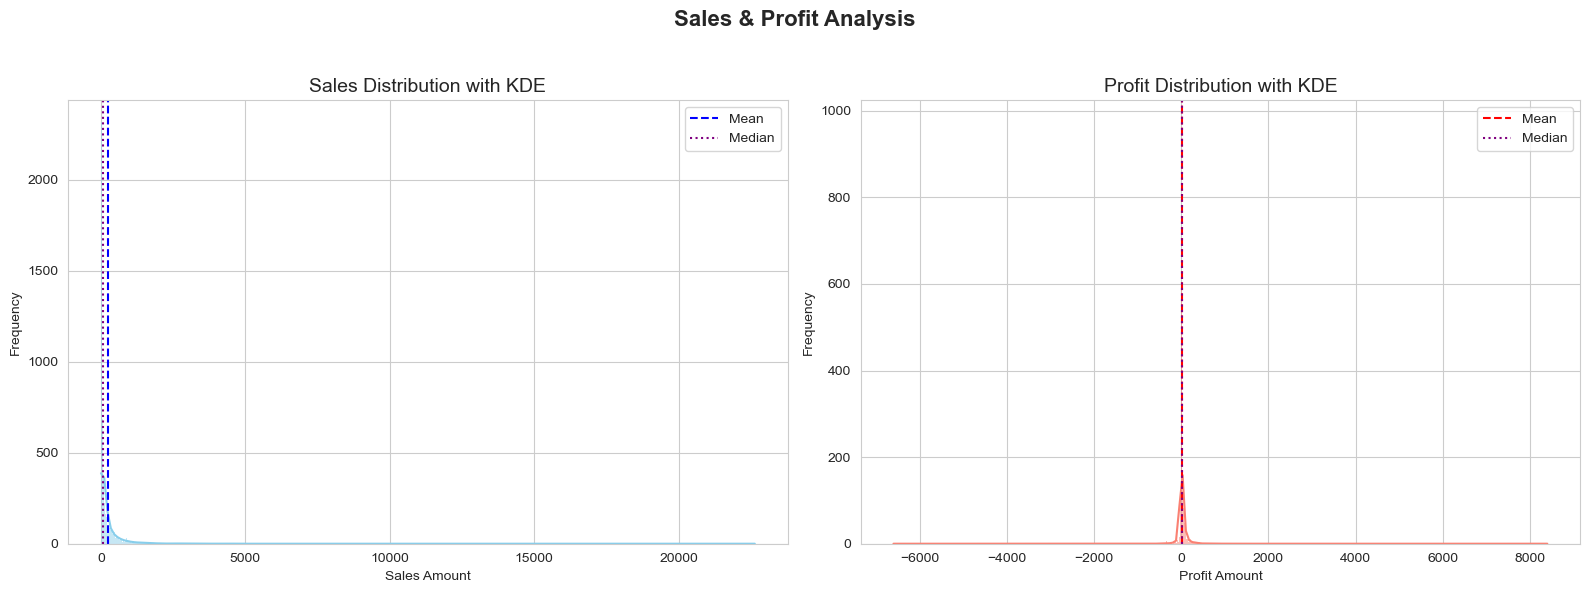

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Apply a modern theme
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Summary Statistics
print("📊 Sales Summary:\n", df['Sales'].describe())
print("\n📈 Profit Summary:\n", df['Profit'].describe())

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Sales Distribution Plot
sns.histplot(df['Sales'], kde=True, color='skyblue', ax=axes[0])
axes[0].axvline(df['Sales'].mean(), color='blue', linestyle='--', label='Mean')
axes[0].axvline(df['Sales'].median(), color='purple', linestyle=':', label='Median')
axes[0].set_title("Sales Distribution with KDE", fontsize=14)
axes[0].set_xlabel("Sales Amount")
axes[0].set_ylabel("Frequency")
axes[0].legend()

# Profit Distribution Plot
sns.histplot(df['Profit'], kde=True, color='salmon', ax=axes[1])
axes[1].axvline(df['Profit'].mean(), color='red', linestyle='--', label='Mean')
axes[1].axvline(df['Profit'].median(), color='purple', linestyle=':', label='Median')
axes[1].set_title("Profit Distribution with KDE", fontsize=14)
axes[1].set_xlabel("Profit Amount")
axes[1].set_ylabel("Frequency")
axes[1].legend()

# Final touches
plt.suptitle("Sales & Profit Analysis", fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


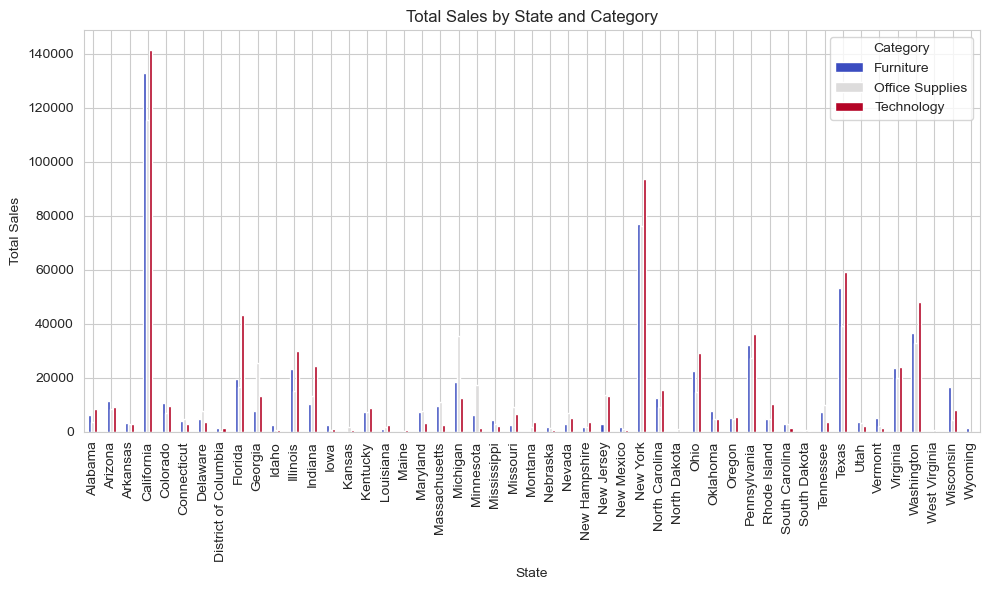

In [6]:
sales_data = df.groupby(['State', 'Category'])['Sales'].sum().unstack()

# Bar chart
sales_data.plot(kind='bar', figsize=(10,6), colormap='coolwarm')
plt.title("Total Sales by State and Category")
plt.xlabel("State")
plt.ylabel("Total Sales")
plt.grid(True)
plt.legend(title="Category")
plt.tight_layout()
plt.show()

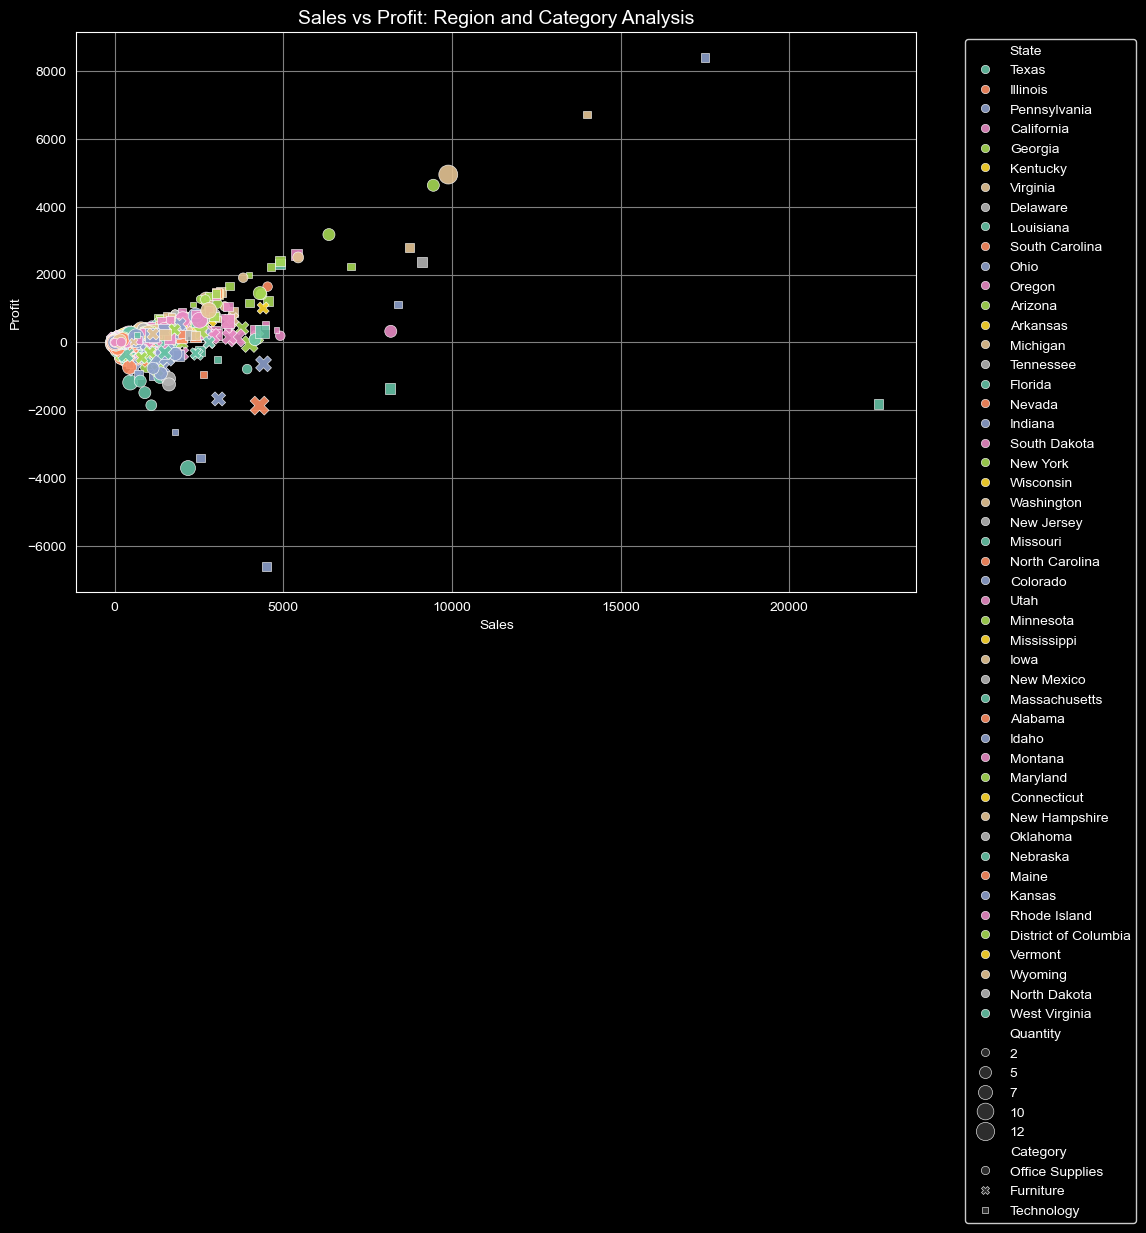

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set black background style
plt.style.use('dark_background')

plt.figure(figsize=(12, 7), facecolor='black')  # Set overall figure background

# Scatter plot with high-contrast colors
sns.scatterplot(
    data=df,
    x='Sales',
    y='Profit',
    hue='State',
    style='Category',
    size='Quantity',
    palette='Set2',
    sizes=(20, 200),
    alpha=0.9
)

# Update titles and labels for visibility
plt.title('Sales vs Profit: Region and Category Analysis', fontsize=14, color='white')
plt.xlabel('Sales', color='white')
plt.ylabel('Profit', color='white')
plt.grid(True, color='gray')

# Customize tick and axis colors
plt.xticks(color='white')
plt.yticks(color='white')

# Legend settings
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', facecolor='black', edgecolor='white', labelcolor='white')

# Manually adjust spacing (avoiding tight_layout warning)
plt.subplots_adjust(top=0.9, bottom=0.1, left=0.1, right=0.8)
plt.show()


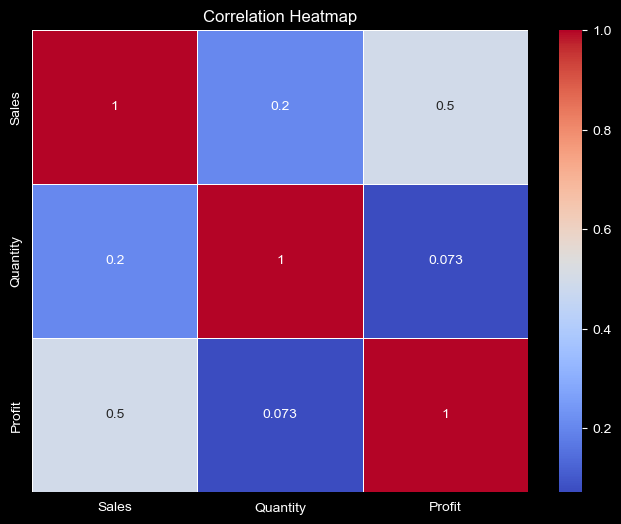

In [8]:
# Compute correlation
correlation = df.corr(numeric_only=True)

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


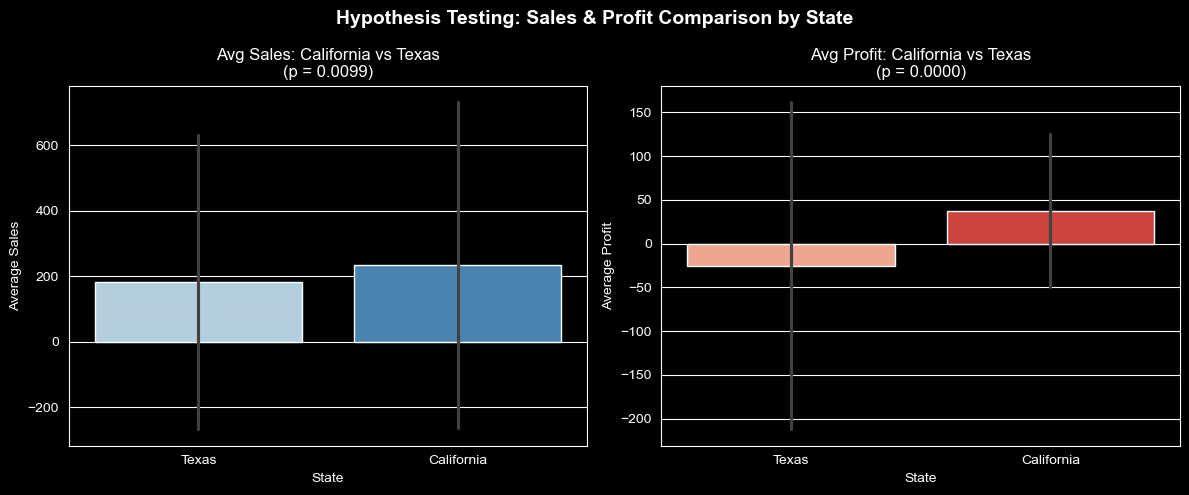

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Select two states
state1 = 'California'
state2 = 'Texas'
df_state1 = df[df['State'] == state1]
df_state2 = df[df['State'] == state2]

# T-tests
t_sales, p_sales = stats.ttest_ind(df_state1['Sales'], df_state2['Sales'], equal_var=False)
t_profit, p_profit = stats.ttest_ind(df_state1['Profit'], df_state2['Profit'], equal_var=False)

# Visualization
plt.figure(figsize=(12, 5))

# Sales plot
plt.subplot(1, 2, 1)
sns.barplot(
    data=df[df['State'].isin([state1, state2])],
    x='State',
    y='Sales',
    hue='State',
    errorbar='sd',
    palette='Blues',
    legend=False
)
plt.title(f"Avg Sales: {state1} vs {state2}\n(p = {p_sales:.4f})")
plt.ylabel("Average Sales")

# Profit plot
plt.subplot(1, 2, 2)
sns.barplot(
    data=df[df['State'].isin([state1, state2])],
    x='State',
    y='Profit',
    hue='State',
    errorbar='sd',
    palette='Reds',
    legend=False
)
plt.title(f"Avg Profit: {state1} vs {state2}\n(p = {p_profit:.4f})")
plt.ylabel("Average Profit")

plt.suptitle("Hypothesis Testing: Sales & Profit Comparison by State", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


Chi-Squared Test Between Category and State
-------------------------------------------------
Chi2 Statistic     : 90.2005
Degrees of Freedom : 96
P-value            : 0.6476


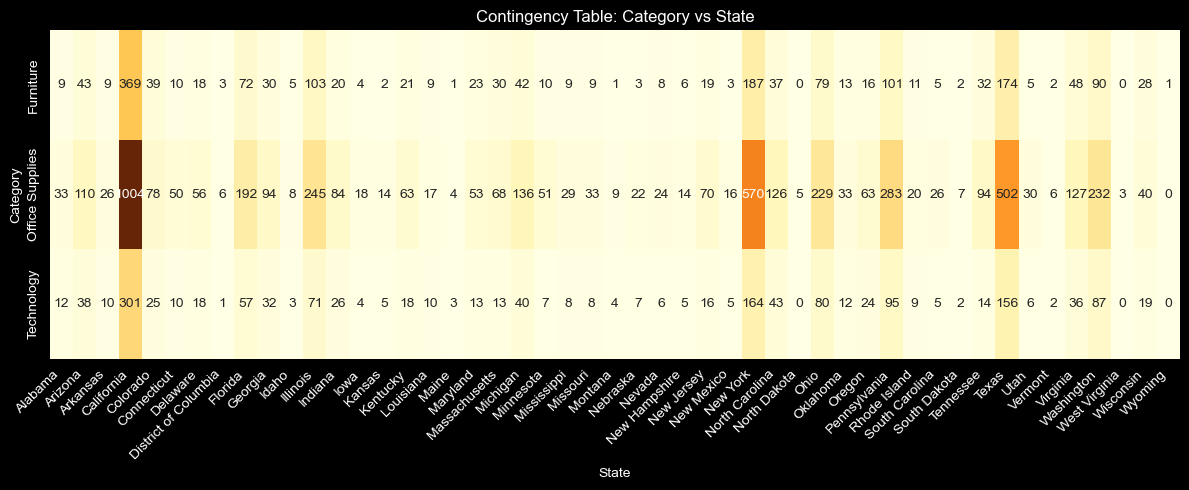

In [30]:
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# Create contingency table: Category vs State
contingency = pd.crosstab(df['Category'], df['State'])

# Perform Chi-Squared Test
chi2, p, dof, expected = chi2_contingency(contingency)

# Display results
print("Chi-Squared Test Between Category and State")
print("-------------------------------------------------")
print(f"Chi2 Statistic     : {chi2:.4f}")
print(f"Degrees of Freedom : {dof}")
print(f"P-value            : {p:.4f}")

# Plot heatmap of the contingency table
plt.figure(figsize=(12, 5))
sns.heatmap(contingency, annot=True, fmt='d', cmap='YlOrBr', cbar=False)
plt.title("Contingency Table: Category vs State")
plt.ylabel("Category")
plt.xlabel("State")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
